In [1]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import IPython

import sys

sys.path.append('.')

from niveau_nappe_core import *

sns.set()

In [2]:
sources = pd.read_csv('Data/points_eau.csv', delimiter=';')
sources.head()

,CODE_BSS,BSS_ID,LONGITUDE,LATITUDE,CODE_INSEE_COMMUNE,NOM_COMMUNE,CODE_STATION_HYDRO,NOM_STATION_HYDRO,CODE_BDLISA,NOM_ENTITE_BDLISA
0,00471X0095/PZ2013,BSS000EBLL,2.578405,50.023705,80733,SENLIS-LE-SEC,E6397010,L'Hallue à Bavelincourt,121BB01,Craie du Séno-Turonien du bassin versant de la...
1,00487X0015/S1,BSS000EECH,3.072798,49.903592,80413,HANCOURT,E6351408,Haute Somme à Ham,121BB01,Craie du Séno-Turonien du bassin versant de la...
2,00755X0006/S1,BSS000FHCQ,0.419810,49.555527,76714,LES TROIS-PIERRES,G9103020,Lézarde à Montivilliers,121AU01,Craie du Séno-Turonien du Bassin Parisien de l...
3,00762X0004/S1,BSS000FHYM,0.860994,49.649737,76456,MOTTEVILLE,H9923020,L'Austreberthe à Saint-Paer,121AU01,Craie du Séno-Turonien du Bassin Parisien de l...
4,00766X0004/S1,BSS000FJMV,0.842289,49.570908,76099,BLACQUEVILLE,H9923020,L'Austreberthe à Saint-Paer,121AU30,Craie marneuse et marnes du Turonien inférieur...


# Download data

In [3]:
code_bss = "00471X0095/PZ2013"
bss_id = "BSS000EBLL"

data = download_data(code_bss, f"Data/{bss_id}.csv")
data

,code_bss,urn_bss,timestamp_mesure,niveau_nappe_eau,mode_obtention,statut,qualification,code_continuite,nom_continuite,code_producteur,nom_producteur,code_nature_mesure,nom_nature_mesure,profondeur_nappe
date_mesure,,,,,,,,,,,,,,
1970-05-04,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,10670400000,69.08,Valeur reconstituée,Donnée contrôlée niveau 2,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,8.79
1970-05-18,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,11880000000,69.60,Valeur reconstituée,Donnée contrôlée niveau 2,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,8.27
1970-06-09,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,13780800000,70.08,Valeur reconstituée,Donnée contrôlée niveau 2,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,7.79
1970-06-16,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,14385600000,70.10,Valeur reconstituée,Donnée contrôlée niveau 2,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,7.77
1970-06-23,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,14990400000,70.02,Valeur reconstituée,Donnée contrôlée niveau 2,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,7.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,1631761200000,65.34,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,12.74
2021-09-17,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,1631854800000,65.32,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,12.76
2021-09-18,00471X0095/PZ2013,http://services.ades.eaufrance.fr/pointeau/004...,1631955600000,65.30,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,2,Point lié au point précédent,265,Service Géologique Régional Nord - Pas de Cala...,NaN,NaN,12.78


In [4]:
data.describe()

,timestamp_mesure,niveau_nappe_eau,code_continuite,code_producteur,code_nature_mesure,nom_nature_mesure,profondeur_nappe
count,7.364000e+03,7364.000000,7364.0,7364.000000,0.0,0.0,7364.000000
mean,1.246842e+12,65.724935,2.0,265.150598,NaN,NaN,12.218069
std,3.362508e+11,2.958107,0.0,0.357680,NaN,NaN,2.946291
min,1.067040e+10,60.460000,2.0,265.000000,NaN,NaN,0.960000
25%,1.154066e+12,63.457500,2.0,265.000000,NaN,NaN,10.280000
50%,1.314014e+12,65.435000,2.0,265.000000,NaN,NaN,12.500000
75%,1.473063e+12,67.660000,2.0,265.000000,NaN,NaN,14.460000
max,1.632096e+12,76.910000,2.0,266.000000,NaN,NaN,17.410000


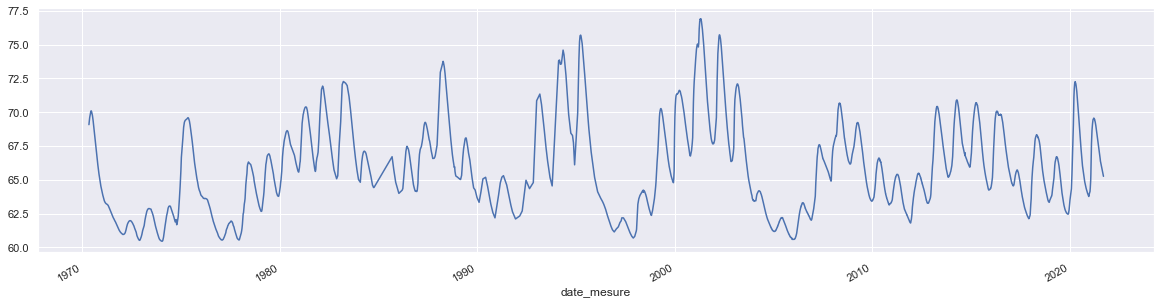

In [5]:
ax = data.niveau_nappe_eau.plot(figsize=(20, 5))
ax.get_figure().savefig(f'Images/piezometre_{bss_id}.png')

# Preprocessing

## Resampling the data to have a measure per day

In [6]:
data.index.to_series().diff()

date_mesure
1970-05-04       NaT
1970-05-18   14 days
1970-06-09   22 days
1970-06-16    7 days
1970-06-23    7 days
               ...  
2021-09-16    1 days
2021-09-17    1 days
2021-09-18    1 days
2021-09-19    1 days
2021-09-20    1 days
Name: date_mesure, Length: 7364, dtype: timedelta64[ns]

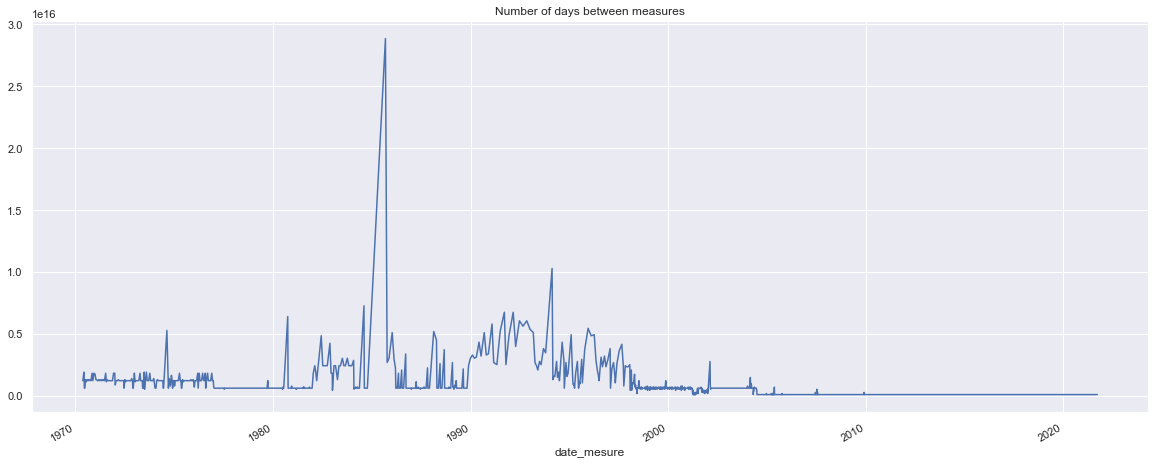

In [8]:
ax = data.index.to_series().diff().plot(figsize=(20, 8), title='Number of days between measures')
ax.get_figure().savefig(f'Images/intervalle_inter_messure_{bss_id}.png')

There are a lot of missing values before the year 2000. We are going to start at 01 Jan 2000

In [9]:
# start_date = '04-05-1970'
# start_date = '09-08-1984'
# start_date = '01-01-2000'
start_date = data.index.min()

data = data.loc[start_date:, :]

new_index = pd.date_range(start_date, data.index[-1])

missing_index = new_index.difference(data.index)

print("There are", missing_index.size, "missing measures over ", new_index.size, " => ", round(100 * missing_index.size/new_index.size, 2), "% of data")

There are 11404 missing measures over  18768  =>  60.76 % of data


<AxesSubplot:>

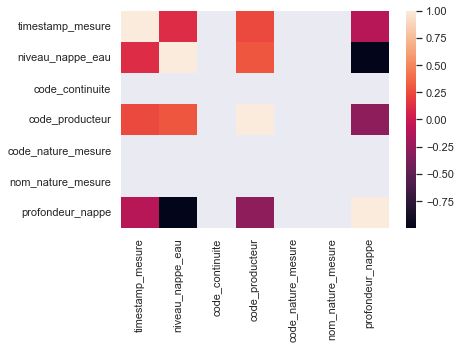

In [10]:
sns.heatmap(data.corr())

In [11]:
# date feature
data = add_date_features(data)

/home/mimbouop/anaconda3/envs/defiegc2021/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, RBF, ExpSineSquared

def build_imputer_model():
    
    kernel = Matern()

    scaler = StandardScaler()

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

    gp = Pipeline([('sc', scaler), ('gpr', gpr)])

    return gp

In [13]:
imputer = build_imputer_model()

imputer.fit(data[['year', 'month', 'quarter', 'weekday', 'day']], data['niveau_nappe_eau'])

print('Score:', imputer.score(data[['year', 'month', 'quarter', 'weekday', 'day']], data['niveau_nappe_eau']))

Score: 1.0


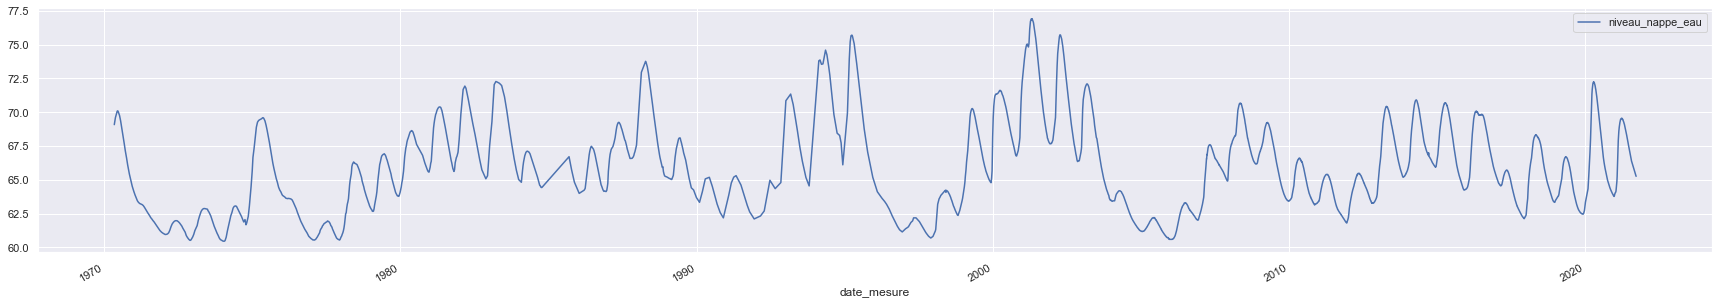

In [14]:
data[['niveau_nappe_eau']].plot(label='with missing', figsize=(20, 5))
plt.show()

In [15]:
missing_X = np.concatenate([missing_index.year.values.reshape((-1, 1)), 
                             missing_index.month.values.reshape((-1, 1)), 
                             missing_index.quarter.values.reshape((-1, 1)), 
                             missing_index.weekday.values.reshape((-1, 1)), 
                             missing_index.day.values.reshape((-1, 1))], axis=1)
missing_X
missing_y = imputer.predict(missing_X)

In [16]:
missing_X.shape, missing_y.shape

((11404, 5), (11404,))

In [17]:
cols = ['year', 'month', 'quarter', 'weekday', 'day', 'niveau_nappe_eau']
missing_X_y = pd.DataFrame(data=np.concatenate([missing_X, np.expand_dims(missing_y, axis=1)], axis=1), 
                           columns=cols, 
                           index=missing_index)

data_no_missing = data[cols].append(missing_X_y)
data_no_missing = data_no_missing.loc[new_index].sort_index()
data_no_missing

,year,month,quarter,weekday,day,niveau_nappe_eau
1970-05-04,1970.0,5.0,2.0,0.0,4.0,69.080000
1970-05-05,1970.0,5.0,2.0,1.0,5.0,63.343744
1970-05-06,1970.0,5.0,2.0,2.0,6.0,53.175131
1970-05-07,1970.0,5.0,2.0,3.0,7.0,47.325855
1970-05-08,1970.0,5.0,2.0,4.0,8.0,46.024854
...,...,...,...,...,...,...
2021-09-16,2021.0,9.0,3.0,3.0,16.0,65.340000
2021-09-17,2021.0,9.0,3.0,4.0,17.0,65.320000
2021-09-18,2021.0,9.0,3.0,5.0,18.0,65.300000
2021-09-19,2021.0,9.0,3.0,6.0,19.0,65.280000


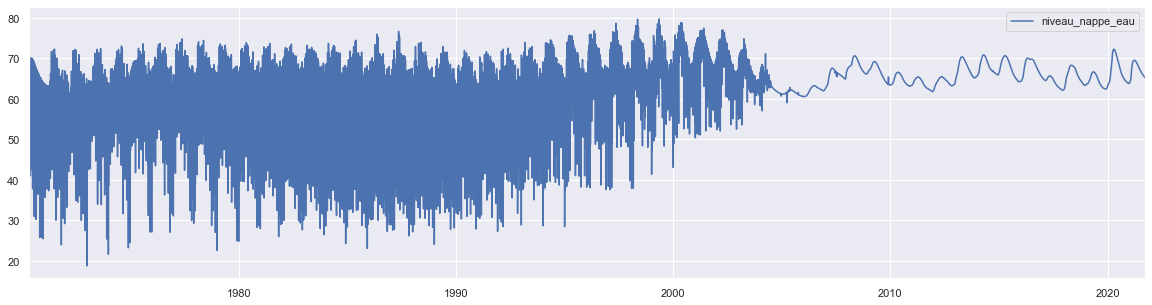

In [20]:
data_no_missing[['niveau_nappe_eau']].plot(label='with missing', figsize=(20, 5))
plt.show()

#Filling missing observations with the nearest observed values

### Feature engineering

- Extract day features: day of week, month, day of month
- Add temperature
- Add precipitation

In [23]:
# First and second degree diff
data_no_missing = add_derivate_features(data_no_missing, 'niveau_nappe_eau')

data_no_missing.tail()

,year,month,quarter,weekday,day,niveau_nappe_eau,diff_niveau_nappe_eau,diff30_niveau_nappe_eau,diff90_niveau_nappe_eau,diff180_niveau_nappe_eau,diff_diff_niveau_nappe_eau
2021-09-16,2021.0,9.0,3.0,3.0,16.0,65.34,-0.02,-0.58,-2.22,-4.18,0.000000e+00
2021-09-17,2021.0,9.0,3.0,4.0,17.0,65.32,-0.02,-0.58,-2.21,-4.21,-1.421085e-14
2021-09-18,2021.0,9.0,3.0,5.0,18.0,65.30,-0.02,-0.58,-2.20,-4.24,1.421085e-14
2021-09-19,2021.0,9.0,3.0,6.0,19.0,65.28,-0.02,-0.58,-2.19,-4.26,0.000000e+00
2021-09-20,2021.0,9.0,3.0,0.0,20.0,65.26,-0.02,-0.58,-2.18,-4.29,0.000000e+00


### Split dataset 

$70\%$ for training, $20\%$ for validation and $10\%$ for test

In [24]:
features = ['niveau_nappe_eau', 'year', 'month', 'quarter', 'weekday', 'day', 'diff_niveau_nappe_eau', 'diff30_niveau_nappe_eau', 'diff90_niveau_nappe_eau', 'diff180_niveau_nappe_eau', 'diff_diff_niveau_nappe_eau']

# features = ['niveau_nappe_eau', 'profondeur_nappe', 'year', 'month', 'quarter', 'weekday', 'day']

df = data_no_missing[features]

n_features = len(features)

n = df.shape[0]

len_train = int(n * 0.7)
len_val = int(n * 0.2)

train_df = df[:len_train]
val_df = df[len_train:len_train+len_val]
test_df = df[len_train+len_val:]

print('Train shape:', train_df.shape)
print('Val shape:', val_df.shape)
print('Test shape:', test_df.shape)
print('Number of observations:', n) 
print('Features:', features, 'number:', n_features)

Train shape: (5553, 10)
Val shape: (1586, 10)
Test shape: (795, 10)
Number of observations: 7934
Features: ['niveau_nappe_eau', 'year', 'month', 'quarter', 'weekday', 'day', 'diff_niveau_nappe_eau', 'diff30_niveau_nappe_eau', 'diff90_niveau_nappe_eau', 'diff180_niveau_nappe_eau'] number: 10


## Data normalization

To do when working with more than one feature

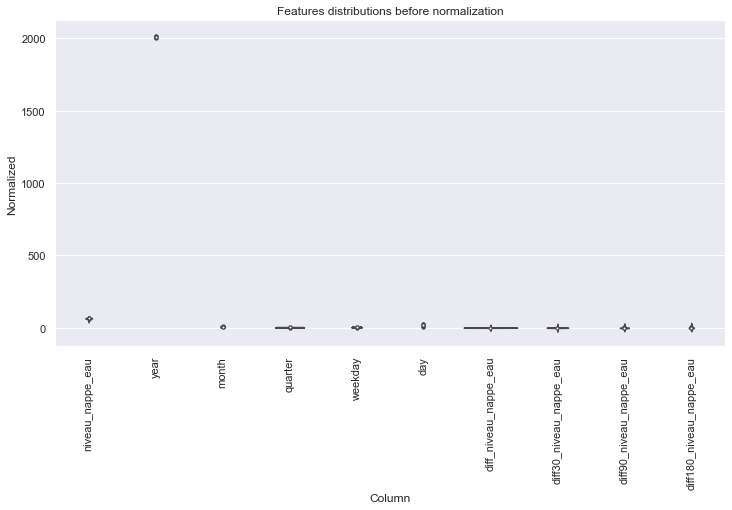

In [25]:
df_tmp = df.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_tmp)
ax.set_xticklabels(df.keys(), rotation=90)
#ax.set_yscale('log')
ax.set_title('Features distributions before normalization');

In [26]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

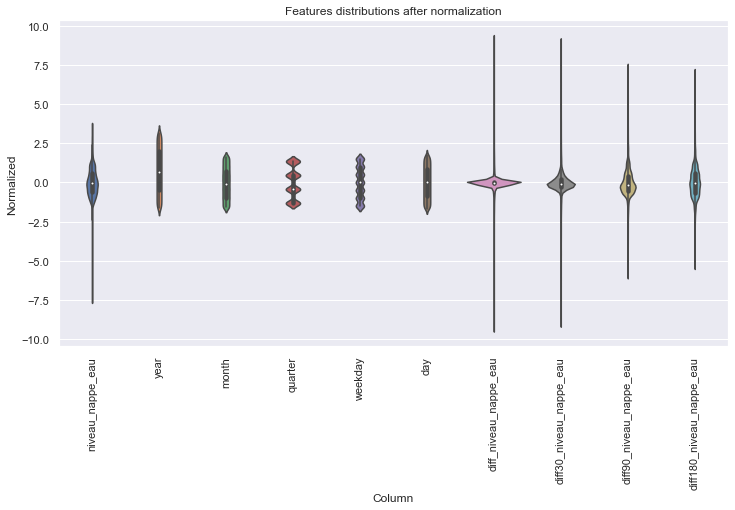

In [27]:
df_norm = (df - train_mean) / train_std
df_norm = df_norm.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_norm)
ax.set_xticklabels(df.keys(), rotation=90)
ax.set_title('Features distributions after normalization');

### Data windowing

In [28]:
# The horizon size
label_width = 93

# history_factor
h_factor = 1.25

# An history length of 
input_width = int(label_width * h_factor)

# Number of feature values to predict at once
shift = label_width

# batch size
batch_size = 64


window = WindowGenerator(input_width=input_width, 
                         label_width=label_width, 
                         shift=shift,
                         batch_size=batch_size,
                         train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['niveau_nappe_eau'])

no_suffled_window = WindowGenerator(input_width=input_width, 
                         label_width=label_width, 
                         shift=shift,
                         batch_size=batch_size,
                         train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['niveau_nappe_eau'], shuffle=False)
print(window)

Total window size: 209
History length: 116
Horizon length: 93
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115]
Label indices: [116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208]
Label column name(s): ['niveau_nappe_eau']


In [29]:
def plot_forecast(model, name, label_index = None):
    last_history = np.expand_dims(test_df.tail(input_width).values, axis=0)
    
    forecast = model.predict(last_history).squeeze()
    
    if label_index is not None:
        forecast = forecast[:, label_index]
        
    forecast = forecast * train_std['niveau_nappe_eau'] + train_mean['niveau_nappe_eau']
    
    forecast_index = pd.date_range(start=test_df.index[-1], end=test_df.index[-1] + pd.Timedelta(label_width, unit='D'))[1:]

    series = df.niveau_nappe_eau.append(pd.Series(data=forecast, index=forecast_index))

    series.plot(figsize=(20, 5), label='')
    plt.plot(forecast_index, forecast, label='forecast', lw=3)
    plt.legend()
    plt.title(name, fontsize=22)
    plt.show()

# Models

In [30]:
MAX_EPOCHS = 50
patience = 5

In [31]:
val_performance = {}
test_performance = {}
models = {}

## Model 

In [32]:
class RNForecaster(tf.keras.Model):
    def __init__(self, kernel_size, filters, label_width, n_blocks=2, use_batch_norm=False,**kwargs):
        super().__init__(**kwargs)
        self.kernel_size = kernel_size
        self.bn = use_batch_norm
        
        self.conv_init = tf.keras.layers.Conv1D(filters=filters, kernel_size=self.kernel_size, activation='relu', padding='same', name='conv_init')
        self.bn_init = tf.keras.layers.BatchNormalization(name='bn_init')
        
        self.convs = []
        self.bns = []
        self.adds = []
        
        for stage in range(n_blocks):
            conv = tf.keras.layers.Conv1D(filters=filters, kernel_size=self.kernel_size, activation='relu', padding='same', name=f"conv_{stage}")
            self.convs.append(conv)
                
            bn = tf.keras.layers.BatchNormalization(name=f"bn_{stage}")
            self.bns.append(bn)
                
            self.adds.append(tf.keras.layers.Add(name=f'add_{stage}'))
                
                
        self.flatten = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units=label_width)
        self.reshape = tf.keras.layers.Reshape((label_width, -1))
        
    def call(self, inputs):
        out = self.conv_init(inputs)
        
        if self.bn:
            out = self.bn_init(out)
            
        for i in range(len(self.convs)):
            out_shortcut = out
            out = self.convs[i](out)
            out = self.bns[i](out)
            out = self.adds[i]([out, out_shortcut])
        
        out = self.flatten(out)
        
        out = self.dropout(out)
        out = self.dense1(out)        
        out = self.dense2(out)
        out = self.reshape(out)
        
        return out
    
    def build_graph(self, input_shape):
        x = tf.keras.layers.Input(shape=(input_shape))
        return tf.keras.models.Model(inputs=[x], outputs=self.call(x))


In [33]:
conv_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv2')

In [34]:
CONV_WIDTH = 3
filters = 64
n_blocks = 2
use_bn = True

rnForecaster = RNForecaster(kernel_size=CONV_WIDTH, label_width=label_width, filters=filters, n_blocks=n_blocks, use_batch_norm=use_bn)

history = compile_and_fit(rnForecaster, window, patience=patience, epochs=MAX_EPOCHS)

val_performance['rnForecaster V0'] = rnForecaster.evaluate(window.val)
test_performance['rnForecaster V0'] = rnForecaster.evaluate(window.test, verbose=0)
models['rnForecaster'] = rnForecaster

Epoch 1/50
84/84 [==============================] - 3s 30ms/step - loss: 1.5370 - val_loss: 0.2381
Epoch 2/50
84/84 [==============================] - 2s 28ms/step - loss: 0.3204 - val_loss: 0.1888
Epoch 3/50
84/84 [==============================] - 2s 28ms/step - loss: 0.2388 - val_loss: 0.1902
Epoch 4/50
84/84 [==============================] - 2s 29ms/step - loss: 0.1986 - val_loss: 0.1681
Epoch 5/50
84/84 [==============================] - 2s 28ms/step - loss: 0.1719 - val_loss: 0.3030
Epoch 6/50
84/84 [==============================] - 2s 27ms/step - loss: 0.1560 - val_loss: 0.1968
Epoch 7/50
84/84 [==============================] - 2s 27ms/step - loss: 0.1429 - val_loss: 0.2703
Epoch 8/50
84/84 [==============================] - 2s 28ms/step - loss: 0.1312 - val_loss: 0.2559
Epoch 9/50
22/22 [==============================] - 0s 5ms/step - loss: 0.1681


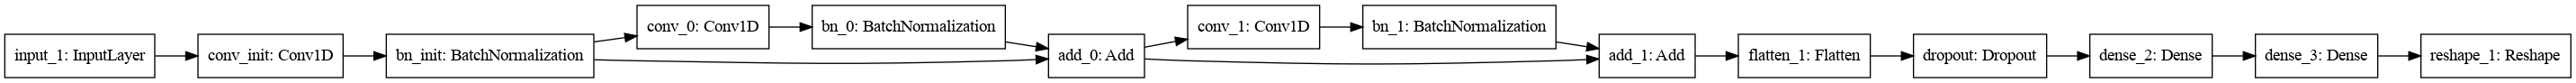

In [35]:
tf.keras.utils.plot_model(rnForecaster.build_graph(window.val.element_spec[0].shape[1:]), 'Images/RNForecaster.png', rankdir='LR')

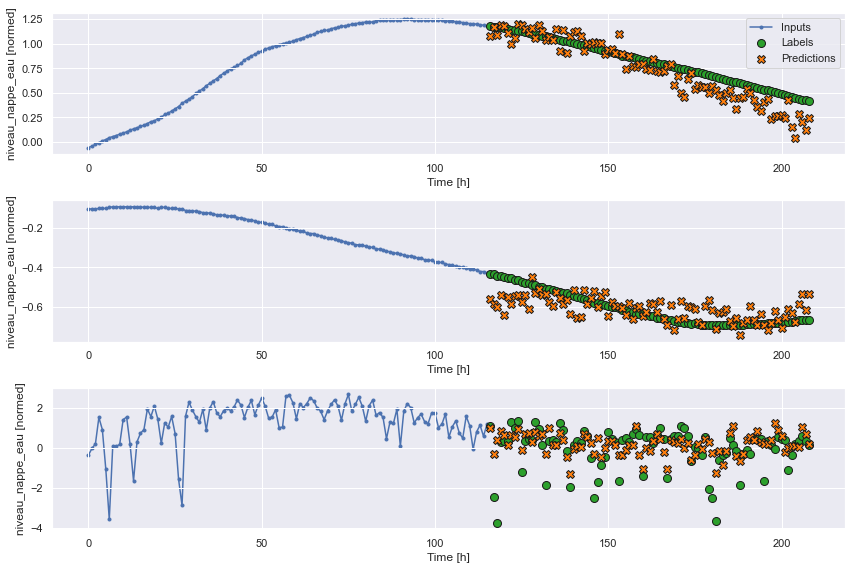

In [36]:
window.plot(rnForecaster)

In [37]:
conv_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv2')

history = compile_and_fit(conv_model2, window, patience=patience, epochs=MAX_EPOCHS)

val_performance['Conv2'] = conv_model2.evaluate(window.val)
test_performance['Conv2'] = conv_model2.evaluate(window.test, verbose=0)
models['conv2'] = conv_model2

Epoch 1/50
84/84 [==============================] - 2s 21ms/step - loss: 0.3589 - val_loss: 0.1373
Epoch 2/50
84/84 [==============================] - 2s 21ms/step - loss: 0.1305 - val_loss: 0.1660
Epoch 3/50
84/84 [==============================] - 2s 20ms/step - loss: 0.0881 - val_loss: 0.1934
Epoch 4/50
84/84 [==============================] - 2s 21ms/step - loss: 0.0654 - val_loss: 0.1848
Epoch 5/50
84/84 [==============================] - 2s 21ms/step - loss: 0.0574 - val_loss: 0.1958
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 0.1373


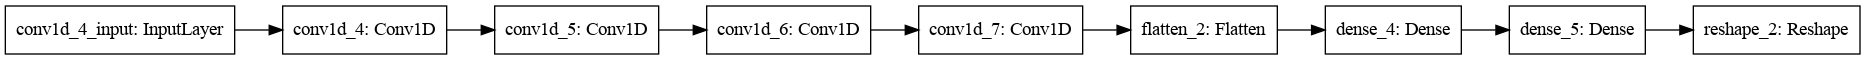

In [38]:
tf.keras.utils.plot_model(conv_model2, 'Images/Conv2.png', rankdir='LR')

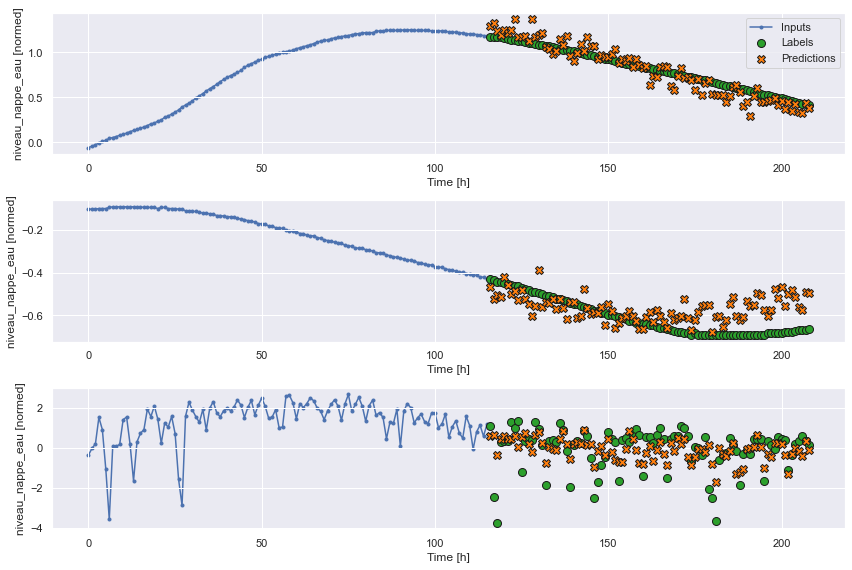

In [39]:
window.plot(conv_model2)

In [40]:
conv_model3 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv3')

history = compile_and_fit(conv_model3, window, patience=patience, epochs=MAX_EPOCHS)

val_performance['Conv3'] = conv_model3.evaluate(window.val)
test_performance['Conv3'] = conv_model3.evaluate(window.test, verbose=0)
models['conv3'] = conv_model3

Epoch 1/50
84/84 [==============================] - 2s 12ms/step - loss: 0.4317 - val_loss: 0.2086
Epoch 2/50
84/84 [==============================] - 1s 12ms/step - loss: 0.2289 - val_loss: 0.2411
Epoch 3/50
84/84 [==============================] - 1s 11ms/step - loss: 0.2189 - val_loss: 0.1952
Epoch 4/50
84/84 [==============================] - 1s 11ms/step - loss: 0.2150 - val_loss: 0.2677
Epoch 5/50
84/84 [==============================] - 1s 11ms/step - loss: 0.2114 - val_loss: 0.2959
Epoch 6/50
84/84 [==============================] - 1s 11ms/step - loss: 0.2075 - val_loss: 0.3160
Epoch 7/50
84/84 [==============================] - 1s 11ms/step - loss: 0.2062 - val_loss: 0.3928
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1952


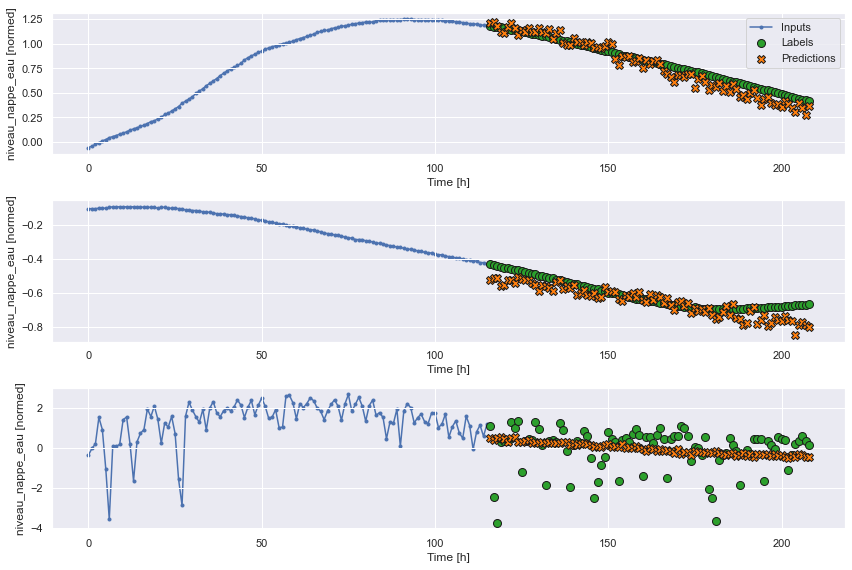

In [41]:
window.plot(conv_model3)

In [42]:
conv_model4 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=256, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='conv4')

history = compile_and_fit(conv_model4, window, patience=patience, epochs=MAX_EPOCHS)

val_performance['Conv4'] = conv_model4.evaluate(window.val)
test_performance['Conv4'] = conv_model4.evaluate(window.test, verbose=0)
models['conv4'] = conv_model4

Epoch 1/50
84/84 [==============================] - 6s 71ms/step - loss: 0.4763 - val_loss: 0.1176
Epoch 2/50
84/84 [==============================] - 6s 70ms/step - loss: 0.2044 - val_loss: 0.2144
Epoch 3/50
84/84 [==============================] - 6s 71ms/step - loss: 0.1542 - val_loss: 0.2217
Epoch 4/50
84/84 [==============================] - 6s 71ms/step - loss: 0.1268 - val_loss: 0.2266
Epoch 5/50
84/84 [==============================] - 6s 71ms/step - loss: 0.1128 - val_loss: 0.3249
Epoch 6/50
22/22 [==============================] - 0s 14ms/step - loss: 0.1176


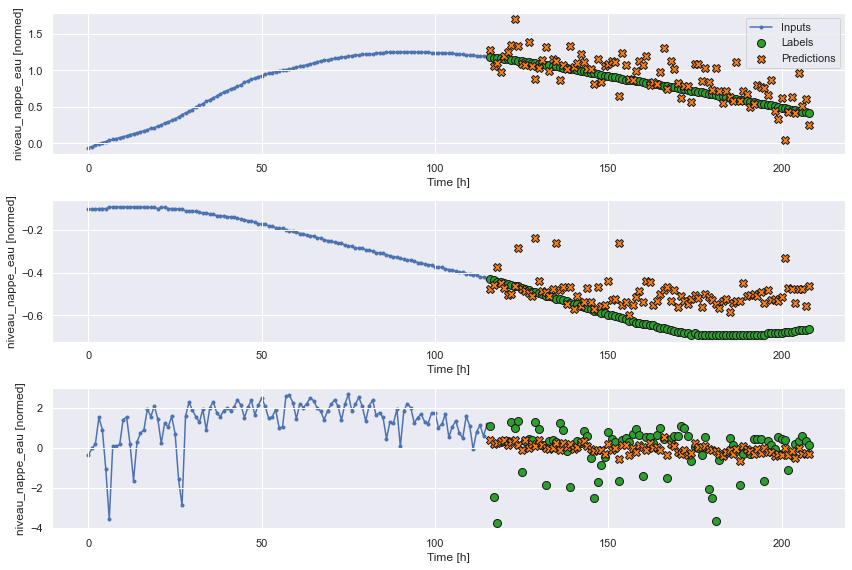

In [43]:
window.plot(conv_model4)

In [44]:
lstm_model2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=label_width),
    tf.keras.layers.Reshape((label_width, -1))
], name='lstm2')

history = compile_and_fit(lstm_model2, no_suffled_window, patience=patience, epochs=MAX_EPOCHS)

val_performance['LSTM 2'] = lstm_model2.evaluate(window.val)
test_performance['LSTM 2'] = lstm_model2.evaluate(window.test, verbose=0)
models['LSTM 2'] = lstm_model2

Epoch 1/50
84/84 [==============================] - 9s 85ms/step - loss: 0.8024 - val_loss: 0.2349
Epoch 2/50
84/84 [==============================] - 7s 80ms/step - loss: 0.5703 - val_loss: 0.1536
Epoch 3/50
84/84 [==============================] - 7s 80ms/step - loss: 0.4448 - val_loss: 0.1226
Epoch 4/50
84/84 [==============================] - 7s 80ms/step - loss: 0.3788 - val_loss: 0.1610
Epoch 5/50
84/84 [==============================] - 7s 80ms/step - loss: 0.3467 - val_loss: 0.1755
Epoch 6/50
84/84 [==============================] - 7s 79ms/step - loss: 0.3273 - val_loss: 0.1736
Epoch 7/50
84/84 [==============================] - 7s 82ms/step - loss: 0.3077 - val_loss: 0.2143
Epoch 8/50
22/22 [==============================] - 1s 27ms/step - loss: 0.1226


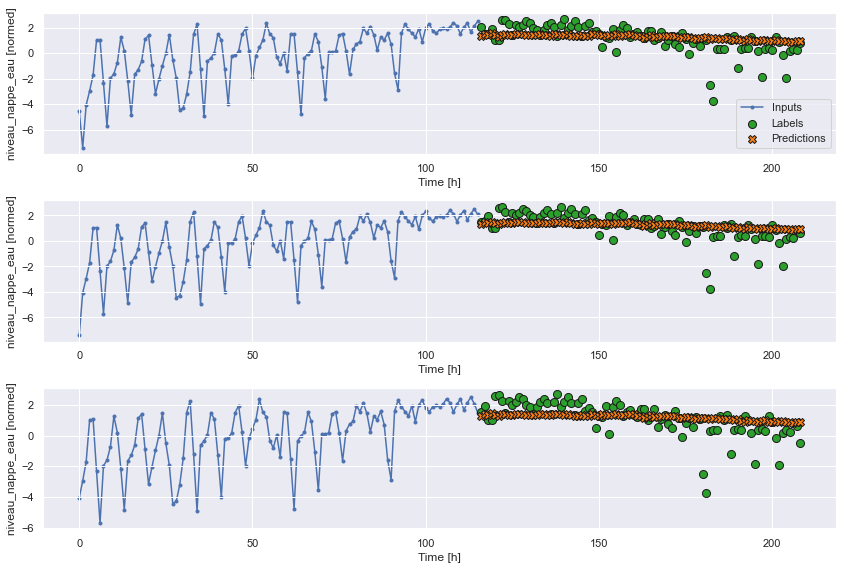

In [45]:
no_suffled_window.plot(lstm_model2)

In [46]:
df_results = pd.DataFrame({'val_loss': val_performance, 'test_loss': test_performance})
df_results

,val_loss,test_loss
rnForecaster V0,0.168136,0.180862
Conv2,0.137273,0.162975
Conv3,0.195215,0.145110
Conv4,0.117589,0.261001
LSTM 2,0.122648,0.236813


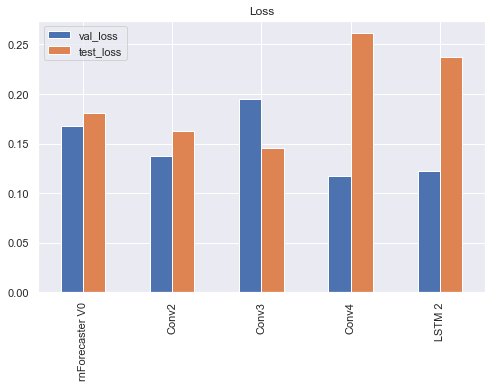

In [47]:
df_results.plot(kind='bar', title='Loss', figsize=(8, 5));

## Ploting forecasts

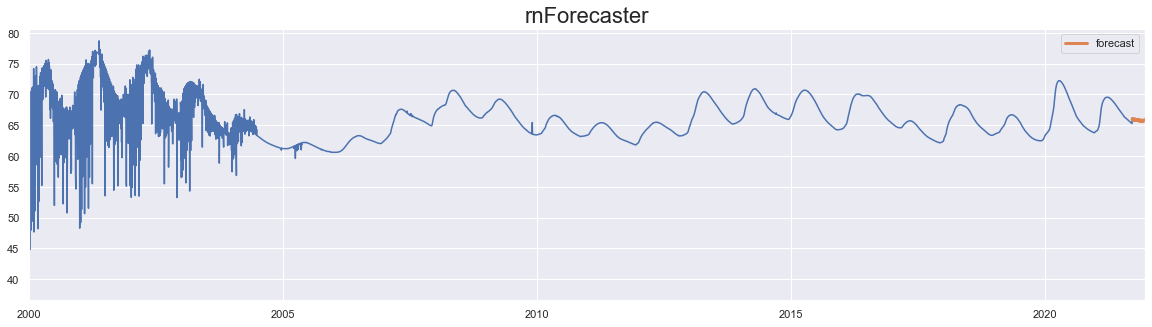

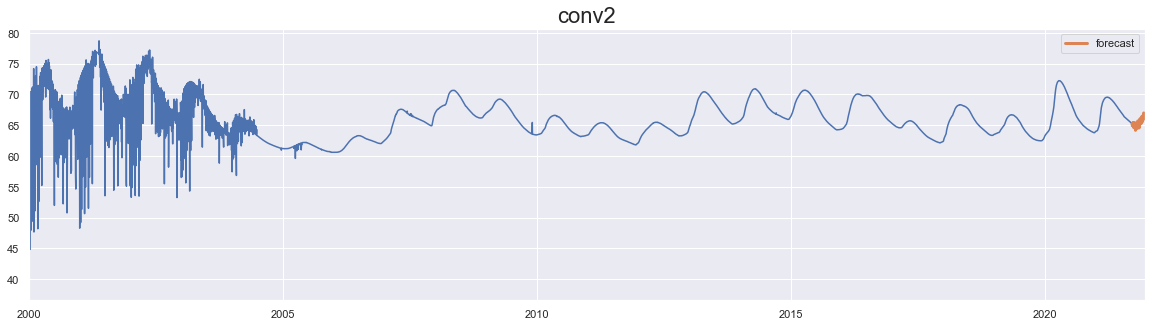

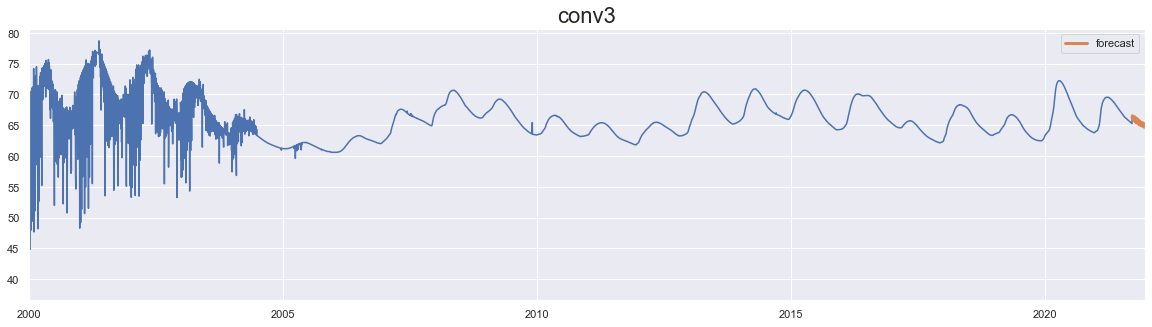

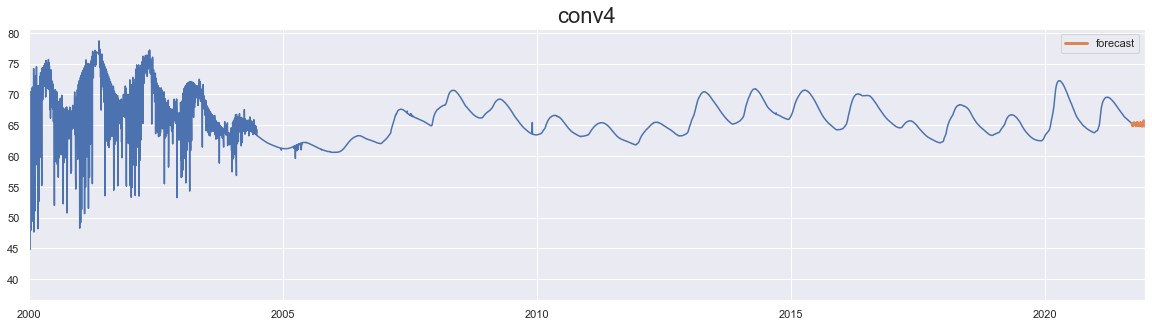

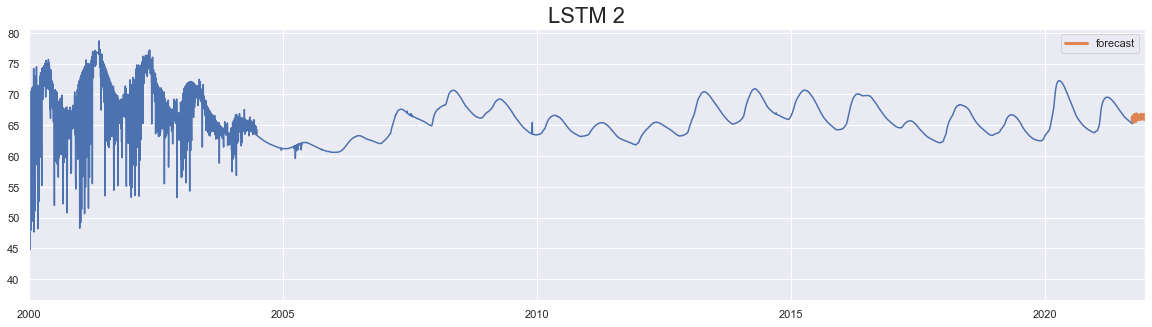

In [48]:
for name, model in models.items():
    label_index = window.column_indices['niveau_nappe_eau'] if 'AR' in name else None
    plot_forecast(model, name, label_index=label_index)

In [138]:
submission = pd.DataFrame({
    'CODE_BSS': code_bss,
    'DATE': preds.index,
    'NIVEAU_PIEZO': preds.niveau_nappe_eau * train_std.niveau_nappe_eau + train_mean.niveau_nappe_eau
})
submission

,CODE_BSS,DATE,NIVEAU_PIEZO
2021-10-15,00471X0095/PZ2013,2021-10-15,65.085997
2021-10-16,00471X0095/PZ2013,2021-10-16,65.139917
2021-10-17,00471X0095/PZ2013,2021-10-17,65.013710
2021-10-18,00471X0095/PZ2013,2021-10-18,64.910781
2021-10-19,00471X0095/PZ2013,2021-10-19,64.945528
...,...,...,...
2022-01-11,00471X0095/PZ2013,2022-01-11,66.841742
2022-01-12,00471X0095/PZ2013,2022-01-12,66.995333
2022-01-13,00471X0095/PZ2013,2022-01-13,66.686672
2022-01-14,00471X0095/PZ2013,2022-01-14,66.708540


In [65]:
test_df

,niveau_nappe_eau,year,month,quarter,weekday,day,diff_niveau_nappe_eau,diff30_niveau_nappe_eau,diff90_niveau_nappe_eau,diff180_niveau_nappe_eau
2019-07-19,-0.222724,2.709884,0.155745,0.455523,0.499449,0.374511,-0.024109,-0.385506,-0.417948,0.296001
2019-07-20,-0.233582,2.709884,0.155745,0.455523,0.999347,0.488160,-0.019630,-0.392361,-0.433509,0.284917
2019-07-21,-0.247153,2.709884,0.155745,0.455523,1.499246,0.601809,-0.024109,-0.399215,-0.454257,0.271616
2019-07-22,-0.260725,2.709884,0.155745,0.455523,-1.500146,0.715458,-0.024109,-0.406070,-0.472411,0.258316
2019-07-23,-0.271582,2.709884,0.155745,0.455523,-1.000248,0.829107,-0.019630,-0.416352,-0.482785,0.247232
...,...,...,...,...,...,...,...,...,...,...
2021-09-16,-0.130437,3.165552,0.732122,0.455523,-0.000450,0.033565,-0.010672,-0.217564,-0.594306,-0.923201
2021-09-17,-0.135865,3.165552,0.732122,0.455523,0.499449,0.147214,-0.010672,-0.217564,-0.591713,-0.929851
2021-09-18,-0.141294,3.165552,0.732122,0.455523,0.999347,0.260863,-0.010672,-0.217564,-0.589119,-0.936501
2021-09-19,-0.146723,3.165552,0.732122,0.455523,1.499246,0.374511,-0.010672,-0.217564,-0.586526,-0.940935
